In [3]:
# PACKAGES 
# -----------------------------------------------------------------------------
import pandas   as pd
import numpy    as np
import datetime as dt
import matplotlib.pyplot as plt


changing data_7d% for considering negetives and choose top 100

__________________________


In [4]:
data_7d = pd.read_csv('data_7d%.csv') 

# Creating a new column for saving the sign
def classify_7d_percent(row):
    if row['7d%'] >= 0:
        return 'positive'
    else:
        return 'negative'

data_7d['negative_positive'] = data_7d.apply(classify_7d_percent, axis=1)

data_7d['sorting_metric'] = data_7d['7d%'] * 0.85 - 0.15 * data_7d[غ'Fluctuation']
sorted_data_7d = data_7d.sort_values(by='sorting_metric', ascending=False)

# Save the sorted data to a CSV file
sorted_data_7d.to_csv('data_7d%.csv', index=False)


In [5]:
# =============================================================================
# INPUT PARAMETERS
# =============================================================================

# Date range for stock & t-bill data pull - default last 10 years
maxDate = dt.datetime.now()                     # Max date to pull from
minDate = maxDate - dt.timedelta(days=10 * 365) # Min date to pull from

import pandas as pd

data_7d = pd.read_csv('data_7d%.csv') 
StockTickers = data_7d['Symbol'][:50].tolist()

print(StockTickers)


# Return and investment strategies
totalIterations  = 3000      # Main Stopping criteria = the total number of iterations
evalGoal         = 'risk'    # Minimze 'risk' or maximize 'sharpe'
minDesiredReturn = 0.075     # meet the minimum desired return. E.g. 7.5%
numPorfolios     = 30        # number of portfolios in swarm to simulate
method           = 'local'   # 'local' or 'global' best function name


['MNT-USD', 'TRB-USD', 'GLMR-USD', 'BICO-USD', 'STPT-USD', 'WLD-USD', 'CDT-USD', 'KNC-USD', 'CRV-USD', 'WEMIX-USD', 'ANT-USD', 'CVX-USD', 'LINK-USD', 'MKR-USD', 'WCFG-USD', 'BCH-USD', 'LUNC-USD', 'ARK-USD', 'KRD-USD', 'XRD-USD', 'CFG-USD', 'EXRD-USD', 'FXS-USD', 'DEL-USD', 'BAND-USD', 'RLB-USD', 'THETA-USD', 'C98-USD', 'USTC-USD', 'APE-USD', 'CUSDT-USD', 'ZEN-USD', 'RUNE-USD', 'API3-USD', 'SXP-USD', 'MURA-USD', 'STX-USD', 'RPL-USD', 'PUNDIX-USD', 'POLY-USD', 'MC-USD', 'CHSB-USD', '1INCH-USD', 'GNS-USD', 'FLOKI-USD', 'SC-USD', 'ICP-USD', 'LDO-USD', 'TON-USD', 'BAL-USD']


_______________________________________

In [6]:
# Helper Inputs 
# -----------------------------------------------------------------------------

MONTHS_IN_YEAR = 12 # The number of months in a year

# bounds for evaluation Function search space
lowerBound        = 0   # no weight in a stock
upperBound        = 1   # Max weight in stock


In [7]:
# =============================================================================
# Import stocks (monthly)
# =============================================================================
# -*- coding: utf-8 -*-
"""
Author: Daniel Carpenter
Function To pull stock data

Financial Engineering
Final Project - July 2022
Modern Portfolio Theory - Portfolio Optimization
"""

import pandas   as pd
import yfinance as yf # Stock data -> pip install yfinance -> https://pypi.org/project/yfinance/


# =============================================================================
# Import stocks (monthly)
# =============================================================================


def pullStockData(StockTickers, minDate, maxDate, interval='1mo'):
    
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    
    # Can dowload the following:
    # "Stock", "Open", "High", "Low", "Close", "Adj Close", "Volume"
    stockMetrics = ["Adj Close"]
    
    # Create df to hold the stocks pulled
    PulledStocks = pd.DataFrame(columns = stockMetrics)

    count = 0
    outOf = len(StockTickers)
    
    # Pull each stocks
    for stock in StockTickers:  
        
        count += 1 # Keep track
        
        # Get the stock ticker over the date range
        print('\nDownloading', stock, '- Progress:', count, '/', outOf)
        stockTicker = yf.download(stock, start=minDate, end=maxDate, 
                                  interval=interval)
        
        # Force reset to coerce to date
        stockTicker = stockTicker.reset_index()
        
        # Assign the ticker name to the stock
        stockTicker["Stock"] = stock
        
        # Concatenate the pulled stock history to the main data frame
        PulledStocks = pd.concat([PulledStocks, stockTicker])  
        
    # Final Column names for the stocks
    stockMetrics = ["Stock", "Date"] + stockMetrics
    PulledStocks = PulledStocks[stockMetrics] 
    
    # Rename the columns
    PulledStocks = PulledStocks.rename(columns = {'Stock':     'stock',
                                                  'Date':      'period',
                                                  'Adj Close': 'adjClose'})
    
    return PulledStocks.dropna() # drop na since mid month sometimes contains nan
# -*- coding: utf-8 -*-
"""
Author: Daniel Carpenter
Function To pull stock data

Financial Engineering
Final Project - July 2022
Modern Portfolio Theory - Portfolio Optimization
"""

import pandas   as pd
import yfinance as yf # Stock data -> pip install yfinance -> https://pypi.org/project/yfinance/


# =============================================================================
# Import stocks (monthly)
# =============================================================================


def pullStockData(StockTickers, minDate, maxDate, interval='1mo'):
    
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    
    # Can dowload the following:
    # "Stock", "Open", "High", "Low", "Close", "Adj Close", "Volume"
    stockMetrics = ["Adj Close"]
    
    # Create df to hold the stocks pulled
    PulledStocks = pd.DataFrame(columns = stockMetrics)

    count = 0
    outOf = len(StockTickers)
    
    # Pull each stocks
    for stock in StockTickers:  
        
        count += 1 # Keep track
        
        # Get the stock ticker over the date range
        print('\nDownloading', stock, '- Progress:', count, '/', outOf)
        stockTicker = yf.download(stock, start=minDate, end=maxDate, 
                                  interval=interval)
        
        # Force reset to coerce to date
        stockTicker = stockTicker.reset_index()
        
        # Assign the ticker name to the stock
        stockTicker["Stock"] = stock
        
        # Concatenate the pulled stock history to the main data frame
        PulledStocks = pd.concat([PulledStocks, stockTicker])  
        
    # Final Column names for the stocks
    stockMetrics = ["Stock", "Date"] + stockMetrics
    PulledStocks = PulledStocks[stockMetrics] 
    
    # Rename the columns
    PulledStocks = PulledStocks.rename(columns = {'Stock':     'stock',
                                                  'Date':      'period',
                                                  'Adj Close': 'adjClose'})
    
    return PulledStocks.dropna() # drop na since mid month sometimes contains nan


# Pull in data based on input parameters (Stock tickers, date range)
RawStockData = pullStockData(StockTickers, minDate, maxDate)

# Pivot so that each stock is its own column
RawStockDataPivot = RawStockData.copy().pivot(index='period', columns='stock',  values='adjClose')
RawStockDataPivot.to_csv('RawStockDataPivot.csv')


# =============================================================================
# Import T-Bill (monthly)
# T-Bill Ref: https://finance.yahoo.com/quote/%5EIRX/history/
# =============================================================================

# Get the average risk free rate
T_Bill = pullStockData(['^IRX'], minDate, maxDate)

# Get the annualized average t-bill rate over date range
# Need over date range to get risk adjusted returns (Sharpe Ratio)
riskFreeRate = T_Bill['adjClose'].mean() / 100 # 100%



[*********************100%%**********************]  1 of 1 completed



C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])


[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*******************

C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])


## FOR ease of viewing, below shows the stock pull function

In [8]:
import inspect

# Get the stock pull function source code
stockPullFunction = inspect.getsource(pullStockData)

# Note the code to import the stock data:
print(stockPullFunction)

def pullStockData(StockTickers, minDate, maxDate, interval='1mo'):
    
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    
    # Can dowload the following:
    # "Stock", "Open", "High", "Low", "Close", "Adj Close", "Volume"
    stockMetrics = ["Adj Close"]
    
    # Create df to hold the stocks pulled
    PulledStocks = pd.DataFrame(columns = stockMetrics)

    count = 0
    outOf = len(StockTickers)
    
    # Pull each stocks
    for stock in StockTickers:  
        
        count += 1 # Keep track
        
        # Get the stock ticker over the date range
        print('\nDownloading', stock, '- Progress:', count, '/', outOf)
        stockTicker = yf.download(stock, start=minDate, end=maxDate, 
                                  interval=interval)
        
        # Force reset to coerce to date
        stockTicker = stockTicker.reset_index()
        
        # Assign the ticker name to the stock
        stockTicker["Stock"] = stock
        
        # Concat

## USE modern porfolio Theory

Calculates:

1. Percent return for each stock
2. Expected Return for each stock
3. Excess Returns for each stock and month
4. Variance-Covariance Matrix

In [9]:
# =============================================================================
# Manipulate stock data
# Create Returns, ExcessReturns, and ExpectedReturns data frames
# Using section 10.2 of Financial Modeling, 4th ed., Benninga
#
# df Percent change pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
# Group by & mean pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# Transposing: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
# Matrix Multiplication: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dot.html
# =============================================================================


# 1. Get the percent return for each stock, for each period
# -- Calculation: Returns = This period return divided by last period minus 1, for each stock
# -----------------------------------------------------------------------------

# Create a data frame for the returns using raw data
Returns = RawStockDataPivot.copy()

# % Return = Percent change from last period to period + 1
# Also, Remove the na for the first periods
Returns = Returns.pct_change().dropna()


# 2. Get the Expected Return for each stock
# -- Calculation: ExpectedReturn = mean(Returns), for each stock
# -----------------------------------------------------------------------------

# Using the Returns data
ExpectedReturns = Returns.copy()

# Group by all periods and get the mean
ExpectedReturns['AllPeriods'] = 'AllPeriods'
ExpectedReturns = ExpectedReturns.groupby('AllPeriods').mean()


# 3. Calculate the Excess Returns for each stock and month
# -- Calculation: ExcessReturns = Returns - ExpectedReturns, for each stock
# -----------------------------------------------------------------------------

ExcessReturns = Returns.copy() - np.array(ExpectedReturns)


# 4. Variance-Covariance Matrix
# -- Calculation: ( t(ExcessReturns) * ExcessReturns ) / ( numPeriods - 1 )
# -----------------------------------------------------------------------------

# Number of periods in sample
numPeriods = len(ExcessReturns.index)

# Covariances between stocks (variance covariance matrix)
VarCov = ExcessReturns.transpose().dot(ExcessReturns) / ( numPeriods - 1 )


## Finance Functions for optimization

Functions for evaluating the risk, sharpe ratio, and expected return of a simulated portfolio

In [10]:
# =============================================================================
# Functions to Evaluate Risk, Expected Return, and Sharpe Ratio
# -- Will be used when optimizing portfolio 
# =============================================================================

# Function to Calculate the ExpectedReturn
# -- Calculation: expectedReturn = MONTH_IN_YEAR * ( Weights * t(ExpectedReturns) )
# -----------------------------------------------------------------------------
def evalExpectedReturn(MONTHS_IN_YEAR, Weights, ExpectedReturns):

    Weights = np.array(Weights)    

    expectedReturn = MONTHS_IN_YEAR * ( Weights.dot( ExpectedReturns.transpose() ) )
    return expectedReturn[0]


# Function to Calculate the Risk
# -- Calculation: risk = sqrt(12) * sqrt( ( Weights * VarCov ) * t(Weights) )
# -----------------------------------------------------------------------------
def evalRisk(MONTHS_IN_YEAR, Weights, VarCov, ExpectedReturns, minDesiredReturn):
    
    # convert to numpy array
    Weights = np.array(Weights)
    
    # IF not the return desired then put a penalty on the portfolio
    # if evalExpectedReturn(MONTHS_IN_YEAR, Weights, ExpectedReturns) < minDesiredReturn:
    #     risk = 9999 # large penalty
        
    # # Else if desired return, then return actual risk
    # else:
    risk = np.sqrt(MONTHS_IN_YEAR) * np.sqrt( ( Weights.dot(VarCov) ).dot( Weights.transpose() ) )
    
    return risk


# Function to Calculate the SharpeRatio
# -- Calculation: (expectedReturn - riskFreeRate) / risk 
# -----------------------------------------------------------------------------
def evalSharpeRatio(expectedReturn, riskFreeRate, risk):
    
    sharpeRatio = ( expectedReturn - riskFreeRate ) / risk 
    return sharpeRatio


Metaheuristic Support Functions to Optimize Portfolio

In [11]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Use metaheuristics to solve for the optimal portfolio
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# =============================================1================================
# evaluation FUNCTION
# evaluation function to evaluate a real-valued solution x
# note: the feasible space is an n-dimensional hypercube centered at the origin with side length = 2 * 500
# =============================================================================
import csv
import os
def evalFunction(Weights, evalGoal='risk'):
    
    # For every portfolio portfolio, calculate the fitness value based on evaluation function
    
    ## Calculate the risk
    risk = evalRisk(MONTHS_IN_YEAR, Weights, VarCov, ExpectedReturns, minDesiredReturn)
    
    ## Calculate the sharpe ratio
    sharpeRatio = evalExpectedReturn(MONTHS_IN_YEAR, Weights, ExpectedReturns)

    fitnessValue = 0 # initialize the output variable

    # Evaluate using the risk (minimize the risk of portfolio)
    if evalGoal == 'risk':
        fitnessValue = risk
    
    # Else use the sharpe ratio (maximize the sharpe ratio of portfolio):
    # Note changed signs because we want to dynamically maximize
    else: 
        fitnessValue = -sharpeRatio

    return fitnessValue

# =============================================================================
# GLOBAL MIN VALUE AND POSITION SEARCH FUNCTION
# Returns the 2 element list (each containing a single value) with the global best portfolio's:
# ---- [0] min value and 
# ---- [1] associate Weights of 
# =============================================================================
def getGlobalBest(FitnessValues, Weights, numPorfolios):
    minValue = np.min(FitnessValues)         # Find the Minimum fitness value of all portfolios
    minIndex = FitnessValues.index(minValue) # Find the index of the Weights for the min. fit. value
    
    minPosition = Weights[minIndex][:] # Now get a copy of the portfolio's Weights with min index
    
    # Returns: the global best portfolio's minimum fitness value and its Weights
    return [minValue, minPosition] 


# =============================================================================
# LOCAL MIN VALUE AND POSITION SEARCH FUNCTION
# Topology: Ring structure with n neighbors  (default 2)
# Returns the 2 element list of lists with the each portfolio's local best within neighborhood
# ---- [0] min value and 
# ---- [1] associate Weights of 
# Can change numStocksInNbrhd to consider more or less in portfolio's neighborhood
# =============================================================================
def getLocalBest(FitnessValues, Weights, numPorfolios,
                  numStocksInNbrhd = 2):  # Number of portfolios to compare to for local best

    lBestFitValue = [] # will hold the best VALUE    of the n surrounding portfolios, for each portfolio
    lBestPosition = [] # will hold the best POSITION of the n surrounding portfolios, for each portfolio
    
    
    # For every portfolio in the portfolio swarm, (starting at n less than index 0)
    for portfolio in range(-numStocksInNbrhd, numPorfolios - numStocksInNbrhd):
        
        # Identify the two neighbors fitness value of this portfolio, 
        # which are the two precedng portfolios
        personalBestNeighbor1 = FitnessValues[portfolio]
        personalBestNeighbor2 = FitnessValues[portfolio + 1]
        
        # Identify the lowest fitness value of this portfolio's the two preciding neighbors
        minNeighValue = min(personalBestNeighbor1, personalBestNeighbor2)
        
        # Store the index of the portfolio
        minNeighIndex = FitnessValues.index(minNeighValue)
        
        # Store the portfolio's best neighbors fitness value and Weights
        lBestFitValue.append(FitnessValues[minNeighIndex])
        lBestPosition.append(Weights[minNeighIndex])
        
    # Returns a list of portfolios and the min of their n best fit. valued neighbors
    return[lBestFitValue, lBestPosition]


# If you needed to index the list just returned for global or local best
VALUE_IDX    = 0
POSITION_IDX = 1


# =============================================================================
# STEP 1 - SWARM INITIALIZATION / EVALUATION
# Randomly initialize a portfolio swarm instance
# Set the partical's best to it's starting Weights
# =============================================================================
def initializeSwarm(numPorfolios, numStocksInPort, functionToGetBest, evalGoal, absoluteMoveLimit):
    
    # In the current time period, Weights[portfolio] and Velocity[portfolio] of each portfolio i, 
    Weights  = [] # to hold the portfolio weights
    Velocity = [] # to hold the portfolio velocities

    # Lists containing info related to each portfolio in portfolio swarm
    pCurrFitValue = []  # X[portfolio] The current Weights of portfolio i
    
    # For each portfolio and stock, randomly initialize the...
    for portfolio in range(numPorfolios):
        # for stock in range(numStocksInPort):
            
        # Create a random feasible solution
        randomValues = np.random.rand(numStocksInPort)
        randomWeights = randomValues / sum(randomValues)
        
        # Ensure that it is an initial feasible solution meeting return contraint
        while evalExpectedReturn(MONTHS_IN_YEAR, randomWeights, ExpectedReturns) < minDesiredReturn:
            randomValues = np.random.rand(numStocksInPort)
            randomWeights = randomValues / sum(randomValues)
            
         
        # Position: give random solution of weights summing to 1
        Weights.append(randomWeights)
        
        # Velocity: give random value between lower and upper bound
        Velocity.append(np.random.rand(numStocksInPort) * absoluteMoveLimit)
    
        # 1.1 - Evaluate fitness value
        pCurrFitValue.append(np.sum( evalFunction(Weights[:], evalGoal) ))  # evaluate the current Weights's fitness value
        
    # 1.2 - Log the individual and global bests
    pBestPosition = Weights[:]       # initialize pBestPosition to the starting Weights
    pBestFitValue = pCurrFitValue[:]  # initialize pBestPosition to the starting Weights's value


    # 1.3 - Log the Global or local best (depends on chosen method) fitness value and Weights
    glBestFitValue, glBestPosition = functionToGetBest(pBestFitValue[:], pBestPosition[:], numPorfolios) 
    
    return [Weights, Velocity, pCurrFitValue, 
            pBestPosition, pBestFitValue, 
            glBestFitValue, glBestPosition]


# =============================================================================
# UPDATE VELOCITY AND POSITION 
# =============================================================================
def updateVelocityAndWeights(intertiaWeight, Velocity, Weights, phi1, phi2, pBestPosition, glBestPosition,
                              numPorfolios, numStocksInPort, absoluteMoveLimit):
# Velocity --------------------------------------------------------------------
    
    ## random weights of r for random Velocity adjustment
    r1, r2 = np.random.rand(), np.random.rand() 
    
    ## Calculations of updating Velocity, separated by 
    ## intertia + cognitive + social (for simplicity)
    vInertia   = np.multiply(intertiaWeight, Velocity[:])                          # Interia   component of updated Velocity
    vCognitive = np.multiply(phi1*r1, np.subtract( pBestPosition[:], Weights[:])) # Cognitive component of ""
    vSocial    = np.multiply(phi2*r2, np.subtract(glBestPosition[:], Weights[:])) # Social    component of ""
    
    ## Update the new Velocity to the summation of intertia, cognitive, and social
    newVelocity =  vInertia[:] + vCognitive[:] + vSocial[:]
    
    ## Limit the Velocity between the upper and lower bound limits
    for portfolio in range(numPorfolios):
        for stock in range(numStocksInPort):
        
            # If the new Velocity of portfolio i is > the ub move limit, then reduce to the limit
            if newVelocity[portfolio][stock] > absoluteMoveLimit:
                newVelocity[portfolio][stock] = absoluteMoveLimit
                
            # If the new Velocity of portfolio i is < the limit, then increase to the limit
            if newVelocity[portfolio][stock] < -absoluteMoveLimit:
                newVelocity[portfolio][stock] = -absoluteMoveLimit
        
    # Position ----------------------------------------------------------------
    
    ## Update new Weights based on the updated Velocity
    newWeights = Weights[:] + newVelocity[:] 
    
    
    ## Make sure that the Weights is within the bounds -----------------------
    
    # For each portfolio and stock
    for portfolio in range(numPorfolios):
        for stock in range(numStocksInPort):
            
            # Push the new Weights to lower bound if lower
            if newWeights[portfolio][stock] < lowerBound:
                newWeights[portfolio][stock] = lowerBound
            
            # Push the new Weights to upper bound if higher
            if newWeights[portfolio][stock] > upperBound:
                newWeights[portfolio][stock] = upperBound

        
    for portfolio in range(numPorfolios):
            
        # Balance the weights to equal 1.
        # Be sure to keep move limit close to 1
        newWeights[portfolio] = np.array(newWeights[portfolio]) / sum(newWeights[portfolio])
        
    
    # Convert Weights and Velocity back to list ------------------------------
    newWeights  = newWeights.tolist()
    newVelocity = newVelocity.tolist()
    
    return [newWeights, newVelocity]


# =============================================================================
# Compare current Weights fitness value to the current best (for each portfolio)
# =============================================================================
def calculatePortfolioBests(Weights, numPorfolios, numStocksInPort,
                           pCurrFitValue, pBestPosition, pBestFitValue, evalGoal):
    # Calculate the fitness of the new Weights
    for portfolio in range(numPorfolios):
        # for stock in range(numStocksInPort):
            
        # Get the current fitness value of the new Weights
        pCurrFitValue[portfolio] = evalFunction(Weights[:][portfolio], evalGoal)
        
        # Compare the current Weights' value to their person best
        if pCurrFitValue[portfolio] < pBestFitValue[portfolio]:
        
            # If better, then set the best VALUE to the current value (as a copy [:])
            pBestFitValue[portfolio] = pCurrFitValue[:][portfolio]
            
            # If better, then set the best POSITION to the current Weights  (as a copy [:])
            pBestPosition[portfolio] = Weights[:][portfolio]
    
    return [pCurrFitValue, pBestPosition, pBestFitValue]


# =============================================================================
# DISPLAY GLOBAL BEST AND DIMENSIONS FUNCTION
# Function for displaying the global best and its dimensions
# =============================================================================
def displayGlobalBest(glBestFitValue, glBestPosition, numStocksInPort, 
                      printDims, StockTickers, expectedReturn,
                      riskFreeRate, evalGoal, 
                      numPeriods=numPeriods,
                      MONTHS_IN_YEAR=MONTHS_IN_YEAR):
    
    # The sharpe ratio
    sharpeRatio = evalSharpeRatio(expectedReturn, riskFreeRate, glBestFitValue)

    # Total % return over the entire period
    monthsInSample = numPeriods/MONTHS_IN_YEAR # since on monthly basis
    returnOverPeriod = (1 + expectedReturn) ** monthsInSample
    
    # Flip signs if maximizing sharpe
    if evalGoal != 'risk':
        glBestFitValue = -glBestFitValue
        sharpeRatio    = -sharpeRatio
        
    # Print the global optima
    print('\n```')
    print('Key Summary Statistics -----------------')
    print(  'Global Best Annualized Risk:\t ' + str(round(100 * glBestFitValue, 1))  + '%')
    print(  'Annualized Expected Return:\t ' + str(round(100 * expectedReturn, 1))  + '%')
    print(  'Sharpe Ratio:\t\t\t% 0.2f' % sharpeRatio)
    print(  'Expected Return over', str(round(monthsInSample, 1) ), 'Years:  ' 
          + str(round(100 * returnOverPeriod, 1))  + '%')
    
    
    # Print each stock (if toggled)
    if printDims:
        print('\nGlobal best weights in each stock (Only includes stocks to invest in):')
        print('```')
        
        # Print the Weights of each stock in markdown table format
        print('| Ticker | Opt. Weight |', sep ='')
        print('|--------|-------------|')
        for stock in range(numStocksInPort):
            print('|' + str(StockTickers[stock]).rjust(7, ' '), 
                    '|' + '{:.1f}'.format(100 * round(glBestPosition[stock], 3) ).rjust(11, ' ') + '% |'
                    )
        
        data_to_write = []
        for stock in range(numStocksInPort):
            data_to_write.append([StockTickers[stock], round(100 * glBestPosition[stock], 1)])
        sorted_data = sorted(data_to_write, key=lambda x: x[1], reverse=True)

        # Desired CSV file name
        csv_file = 'portfolio_optimization_results.csv'

        # New data to append to the file
        new_data = []
        for stock in range(numStocksInPort):
            new_data.append([StockTickers[stock], round(100 * glBestPosition[stock], 1)])

        # If the file does not exist, create it
        if not os.path.isfile(csv_file):
            with open(csv_file, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(['Stock', 'Weight'])  # Write the file header

        # Open the CSV file to read existing data
        with open(csv_file, mode='r', newline='') as file:
            reader = csv.reader(file)
            old_data = [row for row in reader]

        # Add new data to the existing data
        all_data = old_data + new_data

        # Open the CSV file to write the combined data
        with open(csv_file, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(all_data)


                
# =============================================================================
# Plot the optimal weights and prices performance
# =============================================================================
def plotOptimalPerformance(RawStockDataPivot, OptimalWeights):
    
    # Calculate the weighted prices using adj close prices and optimal weights
    OptimizedPrices = RawStockDataPivot.copy().dropna().dot(OptimalWeights.copy())
    
    # Create a plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # Plot the weighted prices
    plt.plot(OptimizedPrices)
    
    # Labels
    ax.set_title("Wt.'d Monthly Adj. Close Price of Optimal Portfolio")
    ax.set_xlabel('Month of Year (Year Only Shown for Simplicity)')
    ax.set_ylabel('Weighted Adj. Close Price (USD)')
    

Driver Function to Optimize Portfolio Weights

In [12]:

# =============================================================================
# SWARM OPTIMIZATION FUNCTION
# Parameters:
# ---- evalGoal:        Minimize 'risk' or maximize 'sharpe' ratio
# ---- numPorfolios:    The number of portfolios within the portfolio swarm
# ---- intertiaWeight:  The weight assigned to the intertia component of the Velocity eq.
# ---- phi1:            Cognitive weight of the Velocity equation. Note phi1 + phi2 <= 4
# ---- phi2:            Social    weight of the Velocity equation. Note phi1 + phi2 <= 4
# ---- totalIterations: The total number of iterations before stopping (Stopping criterion)
# ---- method:          Can use 'local' or 'global' best methods. 
# ----                  'local' uses Ring Structure with 2 neighbors by default 
# ----                  If using 2D and 'global' best method, will export CSV.
# ----                  Reason for exporting is to read in data to R for plotting iterations
# ---- printDims:       Print the dimensions' value or not
# ---- StockTickers:    Tickers of the stocks pulled
# ---- RawStockDataPivot: Raw stock adj.close prices pivoted for showing performance over duration
# =============================================================================

def optimizePortfolioPSO( # -------------------- Defaults --------------------
    evalGoal        = 'risk',   # Minimize 'risk' or maximize 'sharpe'
    minDesiredReturn= minDesiredReturn,# THe minimum desired return
    numPorfolios    = 5,        # number of portfolios in swar
    phi1            = 2,        # Cognitive weight
    phi2            = 2,        # Social weight
    intertiaWeight  = 0.1,      # Constant Inertia weighting value,
    absoluteMoveLimit = 0.1,    # max of 10 pp change in weight
    totalIterations = 10000,    # Stopping criteria = the total number of iterations
    method          = 'local',  # 'local' or 'global' best function name
    printDims       = True,     # Print the stock's value or not,
    StockTickers    = StockTickers, # Tickers of the stocks pulled,
    RawStockDataPivot = RawStockDataPivot # The raw stock data for plotting weighted performance
    ):
    
    numStocksInPort = len(StockTickers) # number of dimensions of problem

    
    # Initialize to global best function by default
    functionToGetBest = getGlobalBest
    
    # If not using the global best, then switch to the local best method
    if method != 'global':
        functionToGetBest = getLocalBest    
    
    
    # -----------------------------------------------------------------------------
    # INITIALIZE POSITION AND VELOCITY, and INITIAL BESTS
    # the portfolio swarm will be represented as a list of Weights, velocities, values, 
    # pBestPosition, and pBestPosition values
    # Note: Weights[0] and Velocity[0] provides the Weights and Velocity of portfolio 0; 
    # Weights[1] and Velocity[1] provides the Weights and Velocity of portfolio 1; and so on.
    # -----------------------------------------------------------------------------
    
    
    # Step 1: Initialize portfolio swarm and get the portfolios' and global best (and current Weights)
    Weights, Velocity, pCurrFitValue, pBestPosition, pBestFitValue, glBestFitValue, glBestPosition = initializeSwarm(numPorfolios, numStocksInPort, 
                                                                                                                     functionToGetBest, evalGoal, absoluteMoveLimit)
    
    # Create empty lists for holding the portfolio swarm iterations
    positionIterations      = [] # Each portfolio's Velocity
    velocityIterations      = [] # Each portfolio's Weights
    gBestPositionIterations = [] # The current Global Best Position
    
    
    # -----------------------------------------------------------------------------
    # Main Loop 
    # -----------------------------------------------------------------------------
    
    iteration = 0
    
    # While meeting total iteration and min desired return requirements
    while (iteration < totalIterations) and ( ( evalExpectedReturn(MONTHS_IN_YEAR, glBestPosition[:], ExpectedReturns) < minDesiredReturn) or ( evalExpectedReturn(MONTHS_IN_YEAR, glBestPosition[:], ExpectedReturns) > minDesiredReturn * 1.01) ): 
        
        # Step 0: Keep track of each iterations/stock for Velocity, Weights, and current global best
        velocityIterations.append(Velocity)           
        positionIterations.append(Weights)           
        gBestPositionIterations.append(glBestPosition) 
        
        # Step 2: Update the Velocity and Weights
        Weights, Velocity = updateVelocityAndWeights(intertiaWeight, Velocity, Weights, 
                                                     phi1, phi2, pBestPosition, glBestPosition,
                                                     numPorfolios, numStocksInPort,
                                                     absoluteMoveLimit)
        
        # Step 3: Recalculate the portfolio and global bests
        pCurrFitValue, pBestPosition, pBestFitValue = calculatePortfolioBests(Weights, 
                                                                              numPorfolios, numStocksInPort,
                                                                              pCurrFitValue, 
                                                                              pBestPosition, 
                                                                              pBestFitValue, 
                                                                              evalGoal)
                
        # Step 4: Get the Global or local best (depends on chosen method) fitness value and Weights
        glBestFitValue, glBestPosition = functionToGetBest(pBestFitValue[:], pBestPosition[:], numPorfolios) 
        
        iteration += 1 # increment iterator

    
    # -----------------------------------------------------------------------------
    # Global Best
    # -----------------------------------------------------------------------------
    
    # Finally, if using the local best method, get the absolute best from the local bests
    if method == 'local':
        gBestFitValue, gBestPosition = getGlobalBest(glBestFitValue, glBestPosition, numPorfolios)
        expectedReturn = evalExpectedReturn(MONTHS_IN_YEAR, gBestPosition, ExpectedReturns)
    
    else: # if not local best, then change the gl best is the global best
        gBestFitValue, gBestPosition = glBestFitValue, glBestPosition
        expectedReturn = evalExpectedReturn(MONTHS_IN_YEAR, gBestPosition, ExpectedReturns)
        
    # -----------------------------------------------------------------------------
    # Print and Export
    # -----------------------------------------------------------------------------
    
    # Print the global (or local best) and each dimensions' Weights
    displayGlobalBest(gBestFitValue, gBestPosition, numStocksInPort, printDims, 
                      StockTickers, expectedReturn, riskFreeRate, evalGoal)
    
    # Show the weighted price perfgormance of the oprtimal portfolio weights
    plotOptimalPerformance(RawStockDataPivot, gBestPosition.copy())
    
    return [gBestPosition, gBestFitValue] # return the best weights and risk



### solve for optimal portfolio

Uses inputs at the top of the file to return the key statistics and the optimal weights of stocks to invest in.

Note that only shows the weights if greater than 0.1%

## first 50:

In [13]:
# =============================================================================
# INPUT PARAMETERS
# =============================================================================

# Date range for stock & t-bill data pull - default last 10 years
maxDate = dt.datetime.now()                     # Max date to pull from
minDate = maxDate - dt.timedelta(days=10 * 365) # Min date to pull from

import pandas as pd

data_7d = pd.read_csv('data_7d%.csv') 
StockTickers = data_7d['Symbol'][:50].tolist()

print(StockTickers)


# Return and investment strategies
totalIterations  = 3000      # Main Stopping criteria = the total number of iterations
evalGoal         = 'risk'    # Minimze 'risk' or maximize 'sharpe'
minDesiredReturn = 0.075     # meet the minimum desired return. E.g. 7.5%
numPorfolios     = 30        # number of portfolios in swarm to simulate
method           = 'local'   # 'local' or 'global' best function name


['MNT-USD', 'TRB-USD', 'GLMR-USD', 'BICO-USD', 'STPT-USD', 'WLD-USD', 'CDT-USD', 'KNC-USD', 'CRV-USD', 'WEMIX-USD', 'ANT-USD', 'CVX-USD', 'LINK-USD', 'MKR-USD', 'WCFG-USD', 'BCH-USD', 'LUNC-USD', 'ARK-USD', 'KRD-USD', 'XRD-USD', 'CFG-USD', 'EXRD-USD', 'FXS-USD', 'DEL-USD', 'BAND-USD', 'RLB-USD', 'THETA-USD', 'C98-USD', 'USTC-USD', 'APE-USD', 'CUSDT-USD', 'ZEN-USD', 'RUNE-USD', 'API3-USD', 'SXP-USD', 'MURA-USD', 'STX-USD', 'RPL-USD', 'PUNDIX-USD', 'POLY-USD', 'MC-USD', 'CHSB-USD', '1INCH-USD', 'GNS-USD', 'FLOKI-USD', 'SC-USD', 'ICP-USD', 'LDO-USD', 'TON-USD', 'BAL-USD']


In [14]:

# Pull in data based on input parameters (Stock tickers, date range)
RawStockData = pullStockData(StockTickers, minDate, maxDate)

# Pivot so that each stock is its own column
RawStockDataPivot = RawStockData.copy().pivot(index='period', columns='stock',  values='adjClose')
RawStockDataPivot.to_csv('RawStockDataPivot.csv')


# =============================================================================
# Import T-Bill (monthly)
# T-Bill Ref: https://finance.yahoo.com/quote/%5EIRX/history/
# =============================================================================

# Get the average risk free rate
T_Bill = pullStockData(['^IRX'], minDate, maxDate)

# Get the annualized average t-bill rate over date range
# Need over date range to get risk adjusted returns (Sharpe Ratio)
riskFreeRate = T_Bill['adjClose'].mean() / 100 # 100%



[*********************100%%**********************]  1 of 1 completed



C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])


[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*******************

C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])



```
Key Summary Statistics -----------------
Global Best Annualized Risk:	 2.9%
Annualized Expected Return:	 65.8%
Sharpe Ratio:			 22.26
Expected Return over 0.7 Years:  140.1%

Global best weights in each stock (Only includes stocks to invest in):
```
| Ticker | Opt. Weight |
|--------|-------------|
|MNT-USD |        0.0% |
|TRB-USD |       28.9% |
|GLMR-USD |        0.0% |
|BICO-USD |        0.0% |
|STPT-USD |        0.0% |
|WLD-USD |        0.0% |
|CDT-USD |        0.1% |
|KNC-USD |        0.8% |
|CRV-USD |        0.5% |
|WEMIX-USD |        1.4% |
|ANT-USD |        0.0% |
|CVX-USD |        0.0% |
|LINK-USD |        2.1% |
|MKR-USD |        0.1% |
|WCFG-USD |       16.4% |
|BCH-USD |        1.6% |
|LUNC-USD |        0.0% |
|ARK-USD |        0.0% |
|KRD-USD |        0.8% |
|XRD-USD |        0.0% |
|CFG-USD |        0.0% |
|EXRD-USD |        0.0% |
|FXS-USD |        0.0% |
|DEL-USD |        0.1% |
|BAND-USD |        2.2% |
|RLB-USD |        0.0% |
|THETA-USD |        0.1% |
|C98-USD

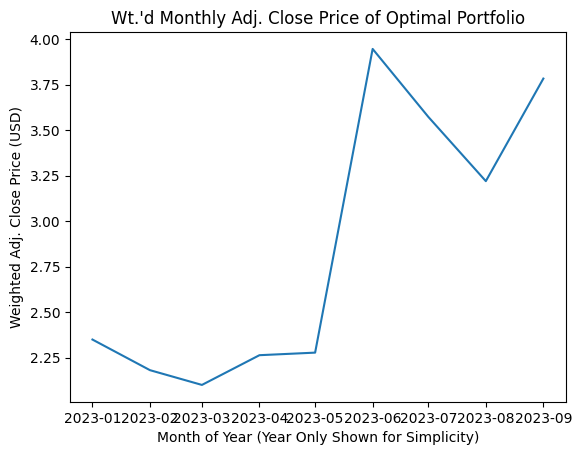

In [15]:
# Call the function based on the imputs at the top
gBestSolution = optimizePortfolioPSO(
                    evalGoal        = evalGoal,        # Minimize 'risk' or maximize 'sharpe'
                    minDesiredReturn= minDesiredReturn,# The minimum desired return
                    numPorfolios    = numPorfolios,    # number of portfolios in swarm to simulate
                    totalIterations = totalIterations, # Main Stopping criteria = the total number of iterations
                    method          = method,          # 'local' or 'global' best function name
                    StockTickers    = StockTickers     # The stock tickers
                    )

## second 50

In [16]:
# =============================================================================
# INPUT PARAMETERS
# =============================================================================

# Date range for stock & t-bill data pull - default last 10 years
maxDate = dt.datetime.now()                     # Max date to pull from
minDate = maxDate - dt.timedelta(days=10 * 365) # Min date to pull from

import pandas as pd

data_7d = pd.read_csv('data_7d%.csv') 
StockTickers = data_7d['Symbol'][50:100].tolist()

print(StockTickers)


# Return and investment strategies
totalIterations  = 3000      # Main Stopping criteria = the total number of iterations
evalGoal         = 'risk'    # Minimze 'risk' or maximize 'sharpe'
minDesiredReturn = 0.075     # meet the minimum desired return. E.g. 7.5%
numPorfolios     = 30        # number of portfolios in swarm to simulate
method           = 'local'   # 'local' or 'global' best function name


['TOMO-USD', 'SNT-USD', 'MIOTA-USD', 'AVAX-USD', 'HNT-USD', 'KLAY-USD', 'SFRXETH-USD', 'POLYX-USD', 'CBETH-USD', 'ETH-USD', 'ETC-USD', 'RETH-USD', 'QTUM-USD', 'DCR-USD', 'SETH2-USD', 'WBETH-USD', 'SAND-USD', 'XEC-USD', 'GALA-USD', 'ZIL-USD', 'BSV-USD', 'SHIB-USD', 'DASH-USD', 'IOTX-USD', 'FRXETH-USD', 'BTSE-USD', 'MX-USD', 'RSR-USD', 'TRX-USD', 'ARB-USD', 'WAXP-USD', 'ETHW-USD', 'BDX-USD', 'KAS-USD', 'ENS-USD', 'STETH-USD', 'EURS-USD', 'SSV-USD', 'UMA-USD', 'BNB-USD', 'QNT-USD', 'ANKR-USD', 'LTC-USD', 'FIL-USD', 'HIVE-USD', 'SURE-USD', 'YFI-USD', 'FLOW-USD', 'JST-USD', 'AXS-USD']


In [17]:

# Pull in data based on input parameters (Stock tickers, date range)
RawStockData = pullStockData(StockTickers, minDate, maxDate)

# Pivot so that each stock is its own column
RawStockDataPivot = RawStockData.copy().pivot(index='period', columns='stock',  values='adjClose')
RawStockDataPivot.to_csv('RawStockDataPivot.csv')


# =============================================================================
# Import T-Bill (monthly)
# T-Bill Ref: https://finance.yahoo.com/quote/%5EIRX/history/
# =============================================================================

# Get the average risk free rate
T_Bill = pullStockData(['^IRX'], minDate, maxDate)

# Get the annualized average t-bill rate over date range
# Need over date range to get risk adjusted returns (Sharpe Ratio)
riskFreeRate = T_Bill['adjClose'].mean() / 100 # 100%


[*********************100%%**********************]  1 of 1 completed



C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])


[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*******************

C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])



```
Key Summary Statistics -----------------
Global Best Annualized Risk:	 9.0%
Annualized Expected Return:	 33.5%
Sharpe Ratio:			 3.61
Expected Return over 0.7 Years:  121.2%

Global best weights in each stock (Only includes stocks to invest in):
```
| Ticker | Opt. Weight |
|--------|-------------|
|TOMO-USD |        0.0% |
|SNT-USD |       15.8% |
|MIOTA-USD |        0.0% |
|AVAX-USD |        0.0% |
|HNT-USD |        0.0% |
|KLAY-USD |        0.0% |
|SFRXETH-USD |        2.4% |
|POLYX-USD |        0.9% |
|CBETH-USD |        0.0% |
|ETH-USD |        0.0% |
|ETC-USD |        0.0% |
|RETH-USD |        0.0% |
|QTUM-USD |       28.8% |
|DCR-USD |        0.0% |
|SETH2-USD |        0.3% |
|WBETH-USD |        0.0% |
|SAND-USD |        0.0% |
|XEC-USD |        0.0% |
|GALA-USD |        0.0% |
|ZIL-USD |        0.0% |
|BSV-USD |        0.0% |
|SHIB-USD |        1.7% |
|DASH-USD |        0.0% |
|IOTX-USD |        0.0% |
|FRXETH-USD |        2.7% |
|BTSE-USD |        0.0% |
| MX-USD |        

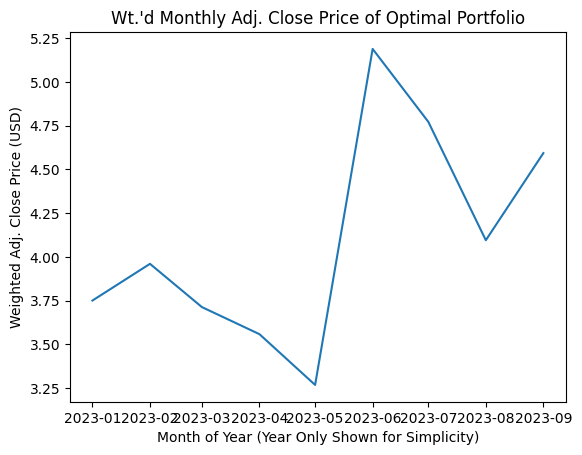

In [18]:
# Call the function based on the imputs at the top
gBestSolution = optimizePortfolioPSO(
                    evalGoal        = evalGoal,        # Minimize 'risk' or maximize 'sharpe'
                    minDesiredReturn= minDesiredReturn,# The minimum desired return
                    numPorfolios    = numPorfolios,    # number of portfolios in swarm to simulate
                    totalIterations = totalIterations, # Main Stopping criteria = the total number of iterations
                    method          = method,          # 'local' or 'global' best function name
                    StockTickers    = StockTickers     # The stock tickers
                    )

## third 50

In [19]:
# =============================================================================
# INPUT PARAMETERS
# =============================================================================

# Date range for stock & t-bill data pull - default last 10 years
maxDate = dt.datetime.now()                     # Max date to pull from
minDate = maxDate - dt.timedelta(days=10 * 365) # Min date to pull from

import pandas as pd

data_7d = pd.read_csv('data_7d%.csv') 
StockTickers = data_7d['Symbol'][100:150].tolist()

print(StockTickers)


# Return and investment strategies
totalIterations  = 3000      # Main Stopping criteria = the total number of iterations
evalGoal         = 'risk'    # Minimze 'risk' or maximize 'sharpe'
minDesiredReturn = 0.075     # meet the minimum desired return. E.g. 7.5%
numPorfolios     = 30        # number of portfolios in swarm to simulate
method           = 'local'   # 'local' or 'global' best function name


['SEI-USD', 'AAVE-USD', 'SFP-USD', 'ZEC-USD', 'TKX-USD', 'ICX-USD', 'KAVA-USD', 'CELO-USD', 'CAKE-USD', 'MANA-USD', 'TFUEL-USD', 'JASMY-USD', 'INJ-USD', 'CFX-USD', 'LRC-USD', 'XEM-USD', 'GLM-USD', 'BTG-USD', 'KCS-USD', 'ELG-USD', 'AR-USD', 'BTC-USD', 'XLM-USD', 'DOT-USD', 'HT-USD', 'IOST-USD', 'LSK-USD', 'GNO-USD', 'XMR-USD', 'TRAC-USD', 'WBTC-USD', 'USDP-USD', 'CTSI-USD', 'ADA-USD', 'GUSD-USD', 'ONT-USD', 'HOT-USD', 'XTZ-USD', 'OP-USD', 'EOS-USD', 'FTM-USD', 'BAT-USD', 'SNX-USD', 'MINA-USD', 'UNI-USD', 'LUSD-USD', 'ONE-USD', 'TRIBE-USD', 'OHM-USD', 'FNSA-USD']


In [20]:

# Pull in data based on input parameters (Stock tickers, date range)
RawStockData = pullStockData(StockTickers, minDate, maxDate)

# Pivot so that each stock is its own column
RawStockDataPivot = RawStockData.copy().pivot(index='period', columns='stock',  values='adjClose')
RawStockDataPivot.to_csv('RawStockDataPivot.csv')


# =============================================================================
# Import T-Bill (monthly)
# T-Bill Ref: https://finance.yahoo.com/quote/%5EIRX/history/
# =============================================================================

# Get the average risk free rate
T_Bill = pullStockData(['^IRX'], minDate, maxDate)

# Get the annualized average t-bill rate over date range
# Need over date range to get risk adjusted returns (Sharpe Ratio)
riskFreeRate = T_Bill['adjClose'].mean() / 100 # 100%


[*********************100%%**********************]  1 of 1 completed



C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])


[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*******************

C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])



```
Key Summary Statistics -----------------
Global Best Annualized Risk:	 5.7%
Annualized Expected Return:	 34.3%
Sharpe Ratio:			 5.80
Expected Return over 0.7 Years:  121.7%

Global best weights in each stock (Only includes stocks to invest in):
```
| Ticker | Opt. Weight |
|--------|-------------|
|SEI-USD |        0.0% |
|AAVE-USD |       31.1% |
|SFP-USD |        0.0% |
|ZEC-USD |       20.5% |
|TKX-USD |        0.0% |
|ICX-USD |        0.0% |
|KAVA-USD |        0.0% |
|CELO-USD |        0.0% |
|CAKE-USD |        0.0% |
|MANA-USD |        2.4% |
|TFUEL-USD |        0.0% |
|JASMY-USD |        5.6% |
|INJ-USD |        0.0% |
|CFX-USD |        0.0% |
|LRC-USD |       11.1% |
|XEM-USD |        0.0% |
|GLM-USD |       10.3% |
|BTG-USD |        0.0% |
|KCS-USD |        0.0% |
|ELG-USD |        0.0% |
| AR-USD |        0.0% |
|BTC-USD |        0.0% |
|XLM-USD |        0.0% |
|DOT-USD |        0.0% |
| HT-USD |        0.0% |
|IOST-USD |        0.0% |
|LSK-USD |        0.0% |
|GNO-USD | 

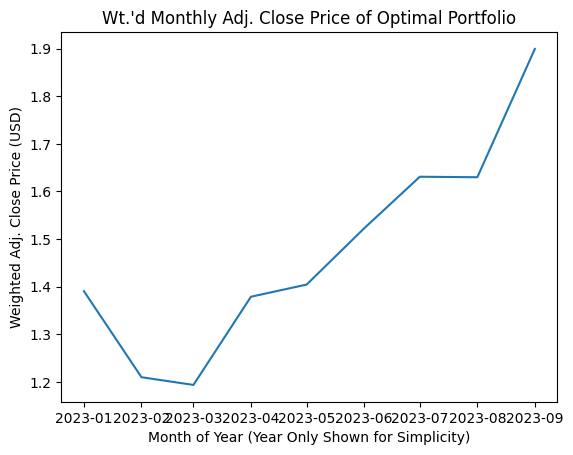

In [21]:
# Call the function based on the imputs at the top
gBestSolution = optimizePortfolioPSO(
                    evalGoal        = evalGoal,        # Minimize 'risk' or maximize 'sharpe'
                    minDesiredReturn= minDesiredReturn,# The minimum desired return
                    numPorfolios    = numPorfolios,    # number of portfolios in swarm to simulate
                    totalIterations = totalIterations, # Main Stopping criteria = the total number of iterations
                    method          = method,          # 'local' or 'global' best function name
                    StockTickers    = StockTickers     # The stock tickers
                    )

### choosing 5 best from first 50

In [22]:
import csv
import pandas as pd

csv_file = 'portfolio_optimization_results.csv'
data = pd.read_csv(csv_file)
sorted_data = data.sort_values(by='Weight', ascending=False)
sorted_data.to_csv(csv_file, index=False)


maxDate = dt.datetime.now()                     # Max date to pull from
minDate = maxDate - dt.timedelta(days=10 * 365) # Min date to pull from


data_7d = pd.read_csv(csv_file) 
StockTickers = data_7d['Stock'][:50].tolist()

print(StockTickers)


# Return and investment strategies
totalIterations  = 3000      # Main Stopping criteria = the total number of iterations
evalGoal         = 'risk'    # Minimze 'risk' or maximize 'sharpe'
minDesiredReturn = 0.075     # meet the minimum desired return. E.g. 7.5%
numPorfolios     = 30        # number of portfolios in swarm to simulate
method           = 'local'   # 'local' or 'global' best function name


['AAVE-USD', 'TRB-USD', 'QTUM-USD', 'BNB-USD', 'ZEC-USD', 'AXS-USD', 'WCFG-USD', 'SNT-USD', 'WBTC-USD', 'MC-USD', 'LRC-USD', 'CUSDT-USD', 'GLM-USD', 'STX-USD', 'SXP-USD', 'C98-USD', 'JASMY-USD', 'ENS-USD', 'GUSD-USD', 'FRXETH-USD', 'MANA-USD', 'SFRXETH-USD', 'BAND-USD', 'LINK-USD', 'SHIB-USD', 'BCH-USD', 'HOT-USD', 'WEMIX-USD', 'POLYX-USD', 'PUNDIX-USD', 'KNC-USD', 'KRD-USD', 'CRV-USD', 'SETH2-USD', 'THETA-USD', 'CDT-USD', 'MKR-USD', 'USTC-USD', 'DEL-USD', 'CAKE-USD', 'INJ-USD', 'LTC-USD', 'CFX-USD', 'TFUEL-USD', 'ANKR-USD', 'FIL-USD', 'KAVA-USD', 'CELO-USD', 'HIVE-USD', 'ICX-USD']


In [23]:
# Reading the content of the CSV file
with open(csv_file, 'r') as file:
    lines = file.readlines()

# Adding a blank line to the end of the file
lines.append('\n')

# Adding the text "results:" on the next line
lines.append('results:\n')

# Saving the new content to the CSV file
with open(csv_file, 'w') as file:
    file.writelines(lines)


In [24]:

# Pull in data based on input parameters (Stock tickers, date range)
RawStockData = pullStockData(StockTickers, minDate, maxDate)

# Pivot so that each stock is its own column
RawStockDataPivot = RawStockData.copy().pivot(index='period', columns='stock',  values='adjClose')
RawStockDataPivot.to_csv('RawStockDataPivot.csv')


# =============================================================================
# Import T-Bill (monthly)
# T-Bill Ref: https://finance.yahoo.com/quote/%5EIRX/history/
# =============================================================================

# Get the average risk free rate
T_Bill = pullStockData(['^IRX'], minDate, maxDate)

# Get the annualized average t-bill rate over date range
# Need over date range to get risk adjusted returns (Sharpe Ratio)
riskFreeRate = T_Bill['adjClose'].mean() / 100 # 100%


[*********************100%%**********************]  1 of 1 completed



C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])


[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed

[*******************

C:\Users\Abdelahi\AppData\Local\Temp\ipykernel_15756\2234782893.py:116: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])



```
Key Summary Statistics -----------------
Global Best Annualized Risk:	 25.1%
Annualized Expected Return:	 10.3%
Sharpe Ratio:			 0.36
Expected Return over 0.7 Years:  106.7%

Global best weights in each stock (Only includes stocks to invest in):
```
| Ticker | Opt. Weight |
|--------|-------------|
|AAVE-USD |        0.0% |
|TRB-USD |        5.7% |
|QTUM-USD |        0.0% |
|BNB-USD |        1.9% |
|ZEC-USD |        0.0% |
|AXS-USD |        4.1% |
|WCFG-USD |        1.0% |
|SNT-USD |        1.7% |
|WBTC-USD |        0.0% |
| MC-USD |        0.7% |
|LRC-USD |        0.0% |
|CUSDT-USD |        0.0% |
|GLM-USD |        0.5% |
|STX-USD |        1.4% |
|SXP-USD |        2.4% |
|C98-USD |        0.0% |
|JASMY-USD |       10.1% |
|ENS-USD |        0.1% |
|GUSD-USD |        7.4% |
|FRXETH-USD |        5.3% |
|MANA-USD |        5.8% |
|SFRXETH-USD |        0.0% |
|BAND-USD |        3.3% |
|LINK-USD |        0.0% |
|SHIB-USD |        0.0% |
|BCH-USD |        0.0% |
|HOT-USD |        3.6% |


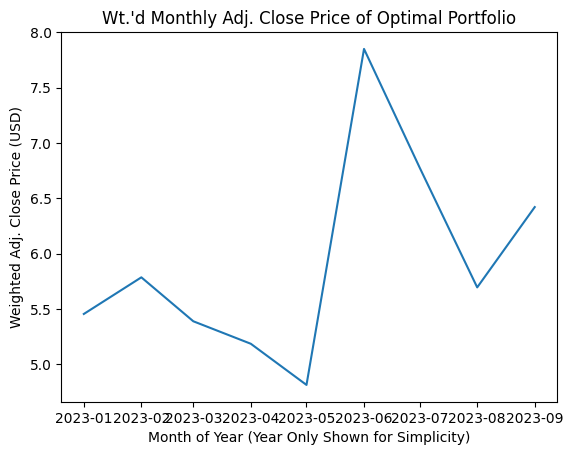

In [25]:
# Call the function based on the imputs at the top
gBestSolution = optimizePortfolioPSO(
                    evalGoal        = evalGoal,        # Minimize 'risk' or maximize 'sharpe'
                    minDesiredReturn= minDesiredReturn,# The minimum desired return
                    numPorfolios    = numPorfolios,    # number of portfolios in swarm to simulate
                    totalIterations = totalIterations, # Main Stopping criteria = the total number of iterations
                    method          = method,          # 'local' or 'global' best function name
                    StockTickers    = StockTickers     # The stock tickers
                    )

______________________________________________________________________

In [26]:
import csv

# Open the original CSV file for reading
csv_file = 'portfolio_optimization_results.csv'
with open(csv_file, 'r') as file:
    lines = file.readlines()

# Find the index where "results:" appears
results_index = lines.index('results:\n')

# Extract the "results" section
results_section = lines[results_index + 1:]

# Sort the results_section based on the weights in descending order
results_section.sort(key=lambda x: float(x.split(',')[1].strip('%')), reverse=True)

# Take the top 5 rows
top_5 = results_section[:5]

# Create a new CSV file for top 5 results
top_5_csv_file = 'top_5_crypto.csv'
with open(top_5_csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['pso_algo_top_5'])  # Header line
    for row in top_5:
        writer.writerow([row.strip()])  # Write each result row

print("Top 5 results have been saved to 'pso_algo_top_5.csv'.")


Top 5 results have been saved to 'pso_algo_top_5.csv'.


In [27]:
import csv
import pandas as pd
from tabulate import tabulate

# Open the original CSV file for reading
csv_file = 'portfolio_optimization_results.csv'
with open(csv_file, 'r') as file:
    lines = file.readlines()

# Find the index where "results:" appears
results_index = lines.index('results:\n')

# Extract the "results" section
results_section = lines[results_index + 1:]

# Sort the results_section based on the weights in descending order
results_section.sort(key=lambda x: float(x.split(',')[1].strip('%')), reverse=True)

# Take the top 5 rows
top_5 = results_section[:5]

# Create a new CSV file for top 5 results
top_5_csv_file = 'pso_algo_top_5.csv'

# Load data_7d DataFrame
data_7d = pd.read_csv('data_7d%.csv')

# Create a dictionary to map symbols to their positive/negative status
symbol_status_dict = {row['Symbol']: 'Positive' if row['7d%'] >= 0 else 'Negative' for _, row in data_7d.iterrows()}

# Create a new list of lists for the top 5 results with added columns
top_5_with_status = [['Symbol', 'Weight', 'Status']]  # Header line
for row in top_5:
    parts = row.split(',')
    symbol = parts[0]
    weight = parts[1].strip('"').strip()
    status = symbol_status_dict.get(symbol, 'N/A')
    top_5_with_status.append([symbol, weight, status])

# Print the top 5 results with added columns in a table-like format
table = tabulate(top_5_with_status, headers="firstrow", tablefmt="grid")
print(table)

# Write the top 5 results with added columns to the new CSV file
with open(top_5_csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(top_5_with_status)

print("\nTop 5 results with added 'Status' column have been saved to 'pso_algo_top_5.csv'.")


+-----------+----------+----------+
| Symbol    |   Weight | Status   |
+===========+==========+==========+
| JASMY-USD |     10.1 | Positive |
+-----------+----------+----------+
| ICX-USD   |      8.3 | Positive |
+-----------+----------+----------+
| GUSD-USD  |      7.4 | Positive |
+-----------+----------+----------+
| WEMIX-USD |      5.9 | Positive |
+-----------+----------+----------+
| MANA-USD  |      5.8 | Positive |
+-----------+----------+----------+

Top 5 results with added 'Status' column have been saved to 'pso_algo_top_5.csv'.
